# AIPI 590 - XAI | Assignment #3
### Explainable Techniques II
### Kayla Haeussler


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIPI-590-XAI/Duke-AI-XAI/blob/dev/templates/template.ipynb)

In [ ]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "Duke-AI-XAI" # Change to your repo name
git_path = 'https://github.com/AIPI-590-XAI/Duke-AI-XAI.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'templates'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# For XAI techniques
import shap

# from alepython import ale_plot
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

I searched for a dataset on Kaggle, this dataset about wine caught my eye since I consider myself a very amateur wine connoisseur
https://www.kaggle.com/code/gamzegedik044/wine-type-classification-quality-prediction 

In [3]:
df = pd.read_csv("wine_quality_merged.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Exploring the data a bit

In [4]:
df["type"].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [5]:
df.groupby("type").agg(["mean", "std"])

fixed acidity           volatile acidity           citric acid  \
               mean       std             mean       std        mean   
type                                                                   
red        8.319637  1.741096         0.527821  0.179060    0.270976   
white      6.854788  0.843868         0.278241  0.100795    0.334192   

                residual sugar           chlorides            ...   density  \
            std           mean       std      mean       std  ...      mean   
type                                                          ...             
red    0.194801       2.538806  1.409928  0.087467  0.047065  ...  0.996747   
white  0.121020       6.391415  5.072058  0.045772  0.021848  ...  0.994027   

                       pH           sulphates              alcohol            \
            std      mean       std      mean       std       mean       std   
type                                                                           
red    0.001887  3.311113  0.154386  0.658149  0.169507  10.422983  1.065668   
white  0.002991  3.188267  0.151001  0.489847  0.114126  10.514267  1.230621   

        quality            
           mean       std  
type                       
red    5.636023  0.807569  
white  5.877909  0.885639  

[2 rows x 24 columns]

I want to use a random forest model here because they are my favorite. It has been a while since I have created one of these models, so I am using the following Data Camp tutorial as a reference
https://www.datacamp.com/tutorial/random-forests-classifier-python

Prepping data for model creating

In [9]:
y = df["type"]
X = df.drop("type", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Creating Random Forest Model

In [12]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("RF Model Accuracy: ", acc)

RF Model Accuracy:  0.9930769230769231


## PDP Plots

The following comes from Dr. Bent's global_explanations.ipynb, including the info here as it helps explain PDP

A Partial Dependence Plot (PDP or PD) shows the marginal effect one or two features have on the predicted outcome of a model  

How it Works:  
1. Select feature of interest  
2. For every instance in training dataset:  
    Keep all other features the same, create variants of the instance by replacing the feature’s value with values from a grid  
    Make predictions with the black box model for newly created instances  
    You now have a set of points for an instance with the feature value from the grid and the respective predictions  
3. Average across all instances and plot  

In [32]:
X.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

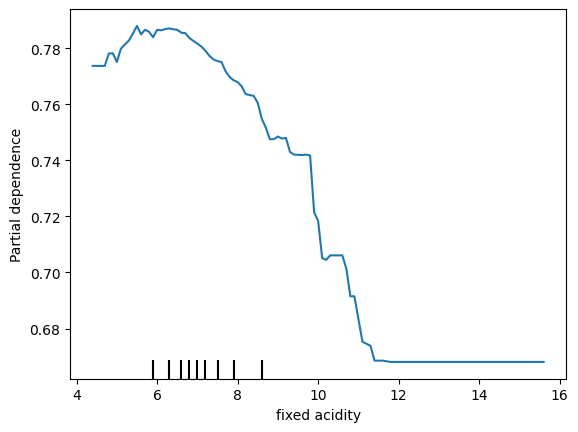

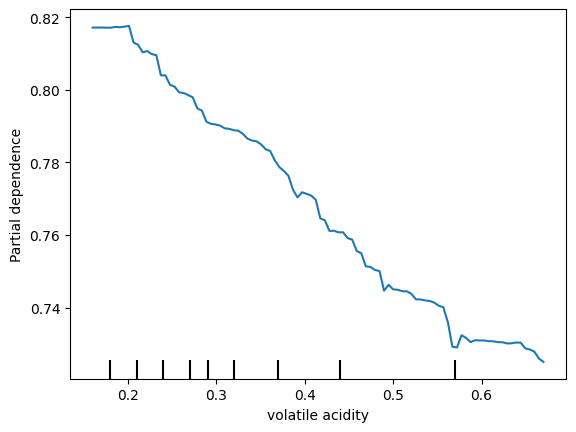

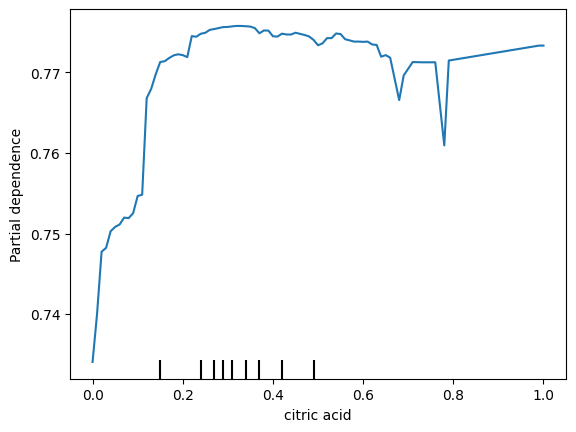

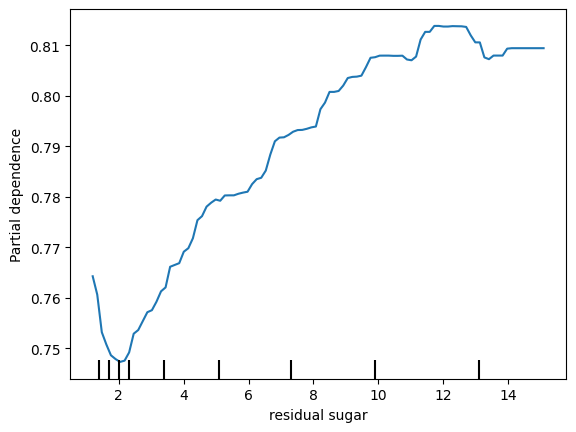

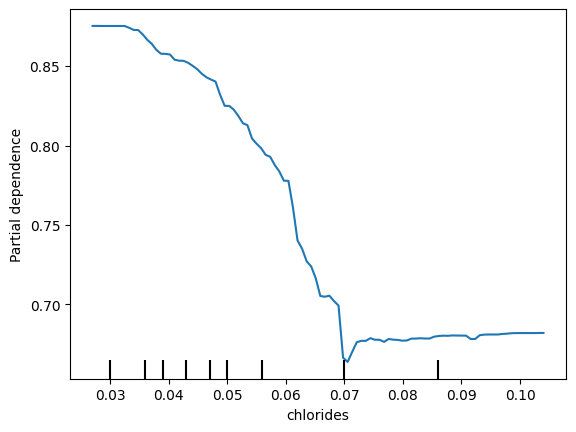

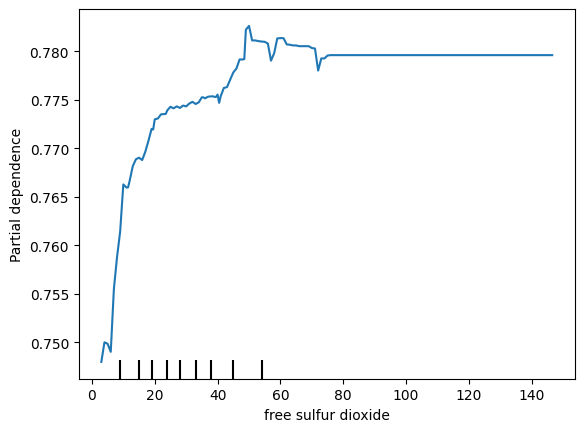

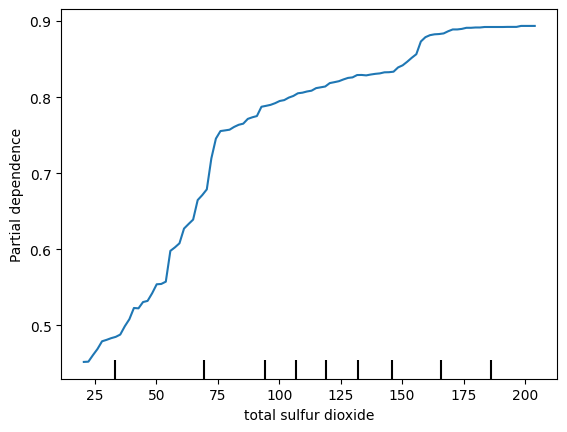

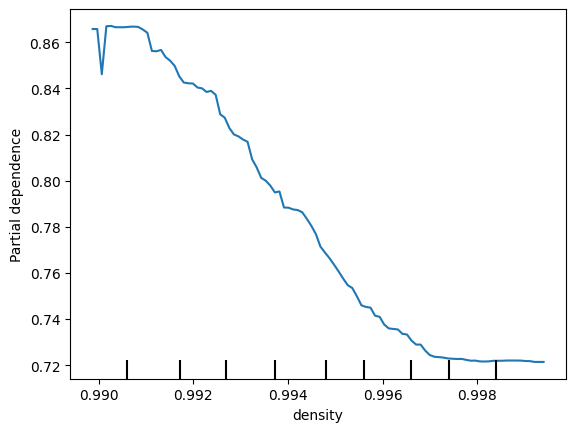

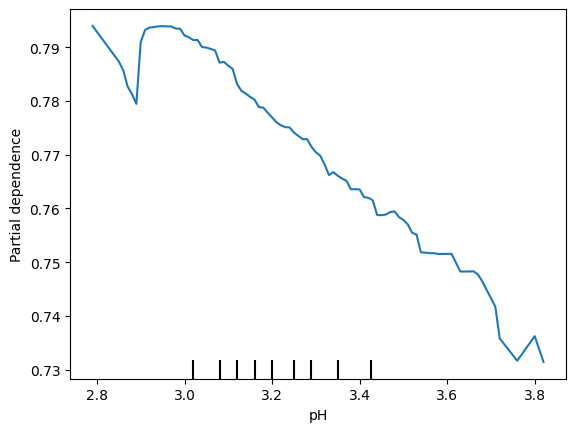

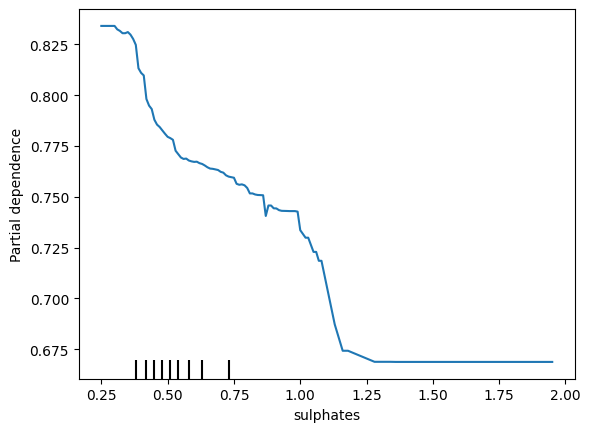

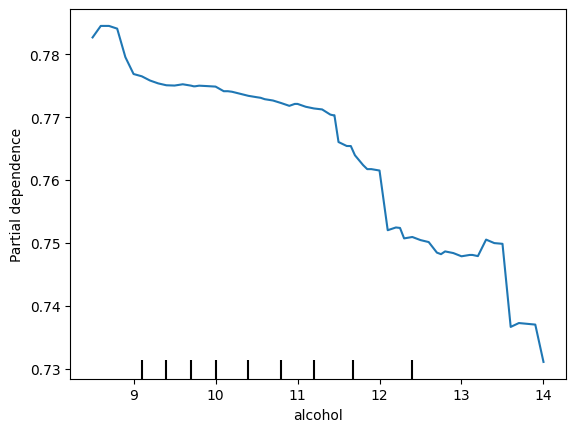

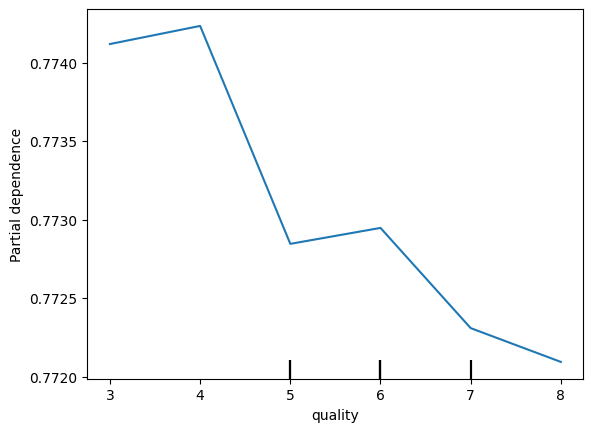

In [35]:
# code from Dr. Bent's global_explanations.ipynb
# adapting it slightly to loop and show plots for all of my features, since I dont have that many features
# Choose the feature of interest
features = X.columns.values

# Use PartialDependenceDisplay to plot PDP
for f in features:
    PartialDependenceDisplay.from_estimator(
        rf_model, X_test, [f], kind="average"
    )  # kind='both'

# Chat GPT-5 wwas used 2:37pm on 9/25 because after I adapted the code from Dr.Bent's notebook to loop across features
# I was getting an error just referencing f in my PartialDependenceDisplay call,
# so I fed the error to GPT5 and it pointed out that i need to add brackets around f since the function was interpreting it as me passing it the string 'f'

## ICE Plots

## ALE Plots